In [19]:
%cd ..

c:\Users\nakag\c3


In [20]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
base_dir = './outputs/shoot4'

result_df = pd.read_csv(os.path.join(base_dir, 'results_1459164.csv'))
shoot_df = pd.read_csv(os.path.join(base_dir, 'shoots_1459164.csv'))

FileNotFoundError: [Errno 2] No such file or directory: './outputs/shoot4\\results_1459164.csv'

In [ ]:
result_df

,frame_id,chance_team,winner,shoots,step_count,n_iter,n_sub_iter
0,1459164,Away,Draw,12,147,1,1
1,1459164,Away,Draw,0,201,1,2
2,1459164,Away,Draw,6,24,1,3
3,1459164,Away,Draw,4,201,1,4
4,1459164,Away,Draw,5,157,1,5
...,...,...,...,...,...,...,...
9995,1459164,Away,Draw,0,101,100,96
9996,1459164,Away,Draw,0,140,100,97
9997,1459164,Away,Draw,0,201,100,98
9998,1459164,Away,Draw,0,92,100,99


In [ ]:
shoot_df

,frame_id,n_iter,n_sub_iter,shoot_x,shoot_y,shoot_direction_x,shoot_direction_y,ball_owned_team,ball_owned_player
0,1459164,1,1,-0.568952,-0.171829,-0.010731,0.004664,1,7
1,1459164,1,1,-0.579289,-0.167337,-0.010243,0.004452,1,7
2,1459164,1,1,-0.589214,-0.163022,-0.009557,0.004155,1,7
3,1459164,1,1,-0.598533,-0.158971,-0.009103,0.003958,1,7
4,1459164,1,1,-0.607380,-0.155125,-0.008631,0.003752,1,7
...,...,...,...,...,...,...,...,...,...
17582,1459164,100,94,-0.686667,-0.090162,-0.010890,0.001621,1,9
17583,1459164,100,94,-0.697502,-0.088551,-0.010790,0.001604,1,9
17584,1459164,100,94,-0.707877,-0.086994,-0.010072,0.001522,1,9
17585,1459164,100,94,-0.717882,-0.085482,-0.009875,0.001493,1,9


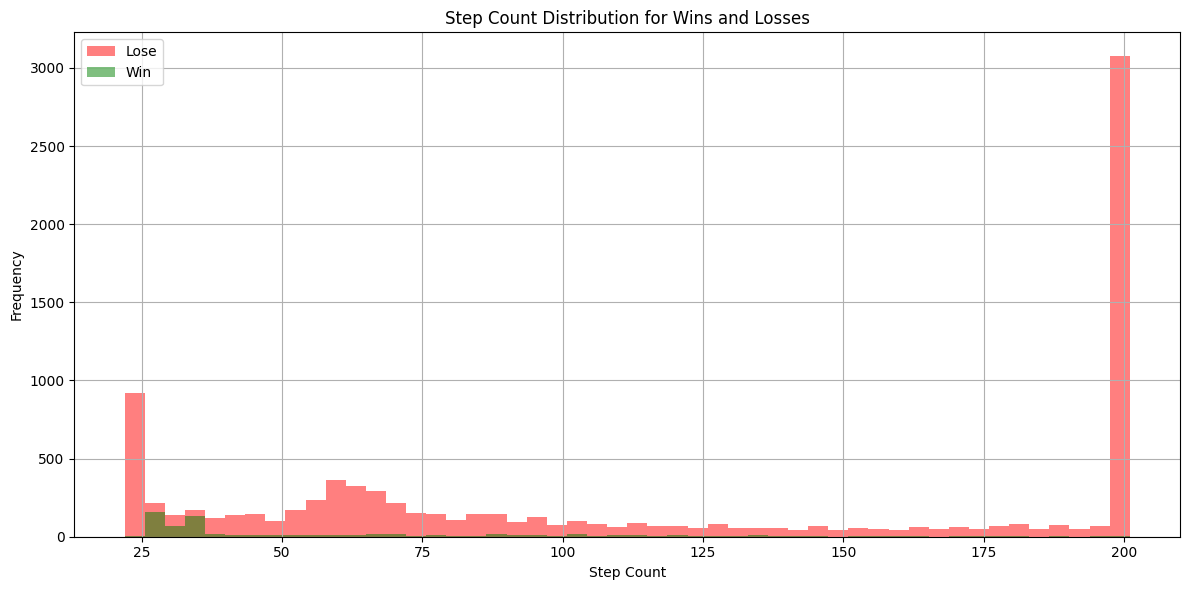

In [ ]:
result_df['is_win'] = result_df['chance_team'] == result_df['winner']

min_step = result_df['step_count'].min()
max_step = result_df['step_count'].max()

# 共通のビンの境界を生成
n_bins = 50
common_bins = np.linspace(min_step, max_step, n_bins + 1) # ビン数+1の値を指定

fig, ax = plt.subplots(figsize=(12, 6))

# Loseのヒストグラム
result_df.loc[~result_df['is_win'], 'step_count'].hist(
    bins=common_bins, ax=ax, alpha=0.5, label='Lose', color='red'
)

# Winのヒストグラム
result_df.loc[result_df['is_win'], 'step_count'].hist(
    bins=common_bins, ax=ax, alpha=0.5, label='Win', color='green'
)

ax.set_title('Step Count Distribution for Wins and Losses')
ax.set_xlabel('Step Count')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()
plt.show()

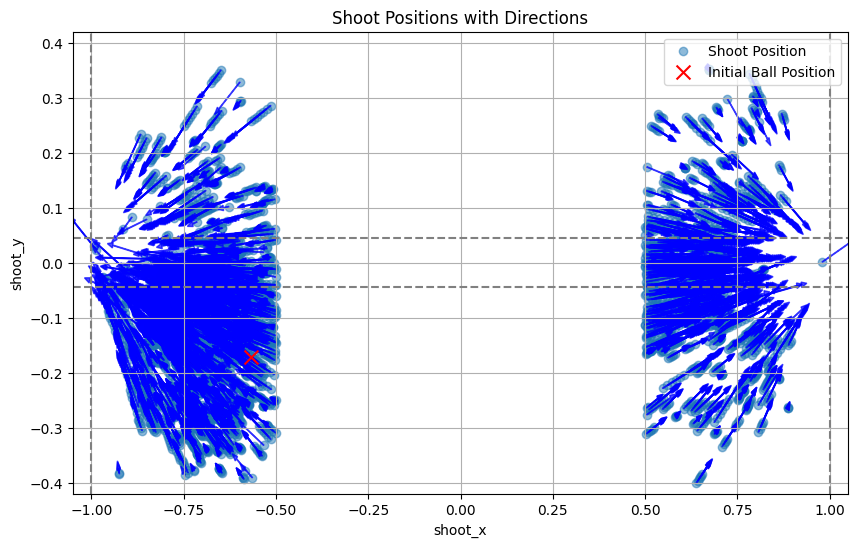

In [ ]:
scale_factor = 10 # 矢印の長さを調整する係数
plt.figure(figsize=(10, 6))

# ゴールはx = -1,1 -0.044 < y < 0.044
plt.axvline(x=-1, color='gray', linestyle='--')
plt.axvline(x=1, color='gray', linestyle='--')
plt.axhline(y=0.044, color='gray', linestyle='--')
plt.axhline(y=-0.044, color='gray', linestyle='--')

# 散布図のプロット
plt.scatter(shoot_df['shoot_x'], shoot_df['shoot_y'], alpha=0.5, label='Shoot Position')

# 各点に対して方向を示す矢印を追加
for i, row in shoot_df.iterrows():
    x = row['shoot_x']
    y = row['shoot_y']
    dx = row['shoot_direction_x']
    dy = row['shoot_direction_y']

    plt.arrow(x, y, dx * scale_factor, dy * scale_factor,
              head_width=0.01, head_length=0.015, fc='blue', ec='blue',
              length_includes_head=True, alpha=0.7)

# SetBallPosition(-0.5689523809523809, -0.17182941176470595) plot as x
plt.scatter(-0.5689523809523809, -0.17182941176470595, color='red', label='Initial Ball Position', s=100, marker='x')

plt.xlabel('shoot_x')
plt.ylabel('shoot_y')
plt.xlim(-1.05, 1.05)
plt.ylim(-0.42, 0.42)
plt.title('Shoot Positions with Directions')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

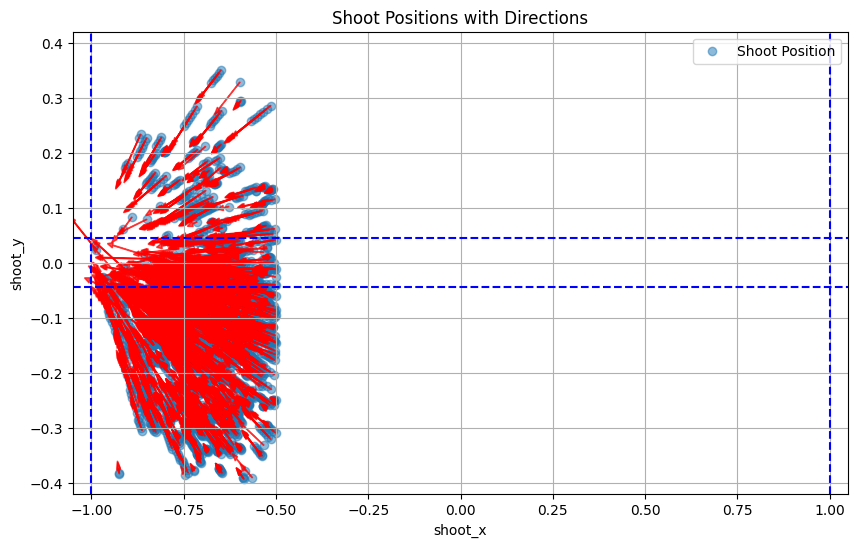

In [ ]:
shoot_df = shoot_df.loc[shoot_df['shoot_x'] < 0]

scale_factor = 10 # 矢印の長さを調整する係数
plt.figure(figsize=(10, 6))

# 散布図のプロット
plt.scatter(shoot_df['shoot_x'], shoot_df['shoot_y'], alpha=0.5, label='Shoot Position')

# 各点に対して方向を示す矢印を追加
for i, row in shoot_df.iterrows():
    x = row['shoot_x']
    y = row['shoot_y']
    dx = row['shoot_direction_x']
    dy = row['shoot_direction_y']

    plt.arrow(x, y, dx * scale_factor, dy * scale_factor,
              head_width=0.01, head_length=0.015, fc='red', ec='red',
              length_includes_head=True, alpha=0.7)

# ゴールはx = -1,1 -0.044 < y < 0.044
plt.axvline(x=-1, color='blue', linestyle='--')
plt.axvline(x=1, color='blue', linestyle='--')
plt.axhline(y=0.044, color='blue', linestyle='--')
plt.axhline(y=-0.044, color='blue', linestyle='--')

plt.xlabel('shoot_x')
plt.ylabel('shoot_y')
plt.xlim(-1.05, 1.05)
plt.ylim(-0.42, 0.42)
plt.title('Shoot Positions with Directions')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
shoot_integrated_for_df = list()
for (n_iter, n_sub_iter), group in shoot_df.groupby(['n_iter', 'n_sub_iter']):
    shoot_integrated_for_df.append({
        'n_iter': n_iter,
        'n_sub_iter': n_sub_iter,
    })

shoot_integrated_df = pd.DataFrame(shoot_integrated_for_df)
shoot_integrated_df['is_shoot'] = True
shoot_integrated_df

,n_iter,n_sub_iter,is_shoot
0,1,1,True
1,1,3,True
2,1,5,True
3,1,8,True
4,1,10,True
...,...,...,...
2704,100,67,True
2705,100,85,True
2706,100,88,True
2707,100,90,True


In [ ]:
result_df = result_df.merge(shoot_integrated_df, on=['n_iter', 'n_sub_iter'], how='left')
result_df['is_shoot'] = result_df['is_shoot'].fillna(False)
result_df

C:\Users\nakag\AppData\Local\Temp\ipykernel_23652\2421903654.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result_df['is_shoot'] = result_df['is_shoot'].fillna(False)


,frame_id,chance_team,winner,shoots,step_count,n_iter,n_sub_iter,is_win,is_shoot
0,1459164,Away,Draw,12,147,1,1,False,True
1,1459164,Away,Draw,0,201,1,2,False,False
2,1459164,Away,Draw,6,24,1,3,False,True
3,1459164,Away,Draw,4,201,1,4,False,False
4,1459164,Away,Draw,5,157,1,5,False,True
...,...,...,...,...,...,...,...,...,...
9995,1459164,Away,Draw,0,101,100,96,False,False
9996,1459164,Away,Draw,0,140,100,97,False,False
9997,1459164,Away,Draw,0,201,100,98,False,False
9998,1459164,Away,Draw,0,92,100,99,False,False


In [ ]:
output_for_df = list()
for n_iter, group in result_df.groupby('n_iter'):
    win_ratio = group['is_win'].mean()
    shoot_ratio = group['is_shoot'].mean()
    output_for_df.append({
        'n_iter': n_iter,
        'shoot_ratio': shoot_ratio,
        'win_ratio': win_ratio,
    })
output_df = pd.DataFrame(output_for_df)
output_df['exam_id'] = 'shoot-4'
output_df

,n_iter,shoot_ratio,win_ratio,exam_id
0,1,0.30,0.06,shoot-4
1,2,0.25,0.05,shoot-4
2,3,0.23,0.04,shoot-4
3,4,0.27,0.12,shoot-4
4,5,0.22,0.08,shoot-4
...,...,...,...,...
95,96,0.27,0.11,shoot-4
96,97,0.35,0.12,shoot-4
97,98,0.24,0.09,shoot-4
98,99,0.32,0.06,shoot-4


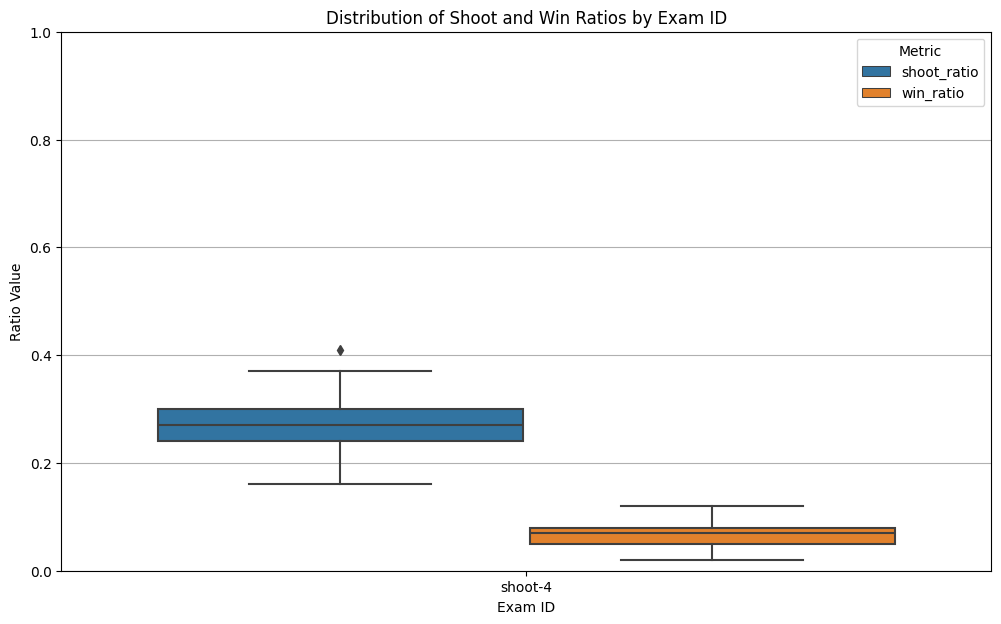

In [ ]:
import seaborn as sns

df = output_df.copy()
df_melted = df.melt(id_vars=['n_iter', 'exam_id'], value_vars=['shoot_ratio', 'win_ratio'],
                    var_name='metric', value_name='value')

plt.figure(figsize=(12, 7))
sns.boxplot(x='exam_id', y='value', hue='metric', data=df_melted)
plt.title('Distribution of Shoot and Win Ratios by Exam ID')
plt.xlabel('Exam ID')
plt.ylabel('Ratio Value')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(title='Metric')
# plt.tight_layout()
plt.show()

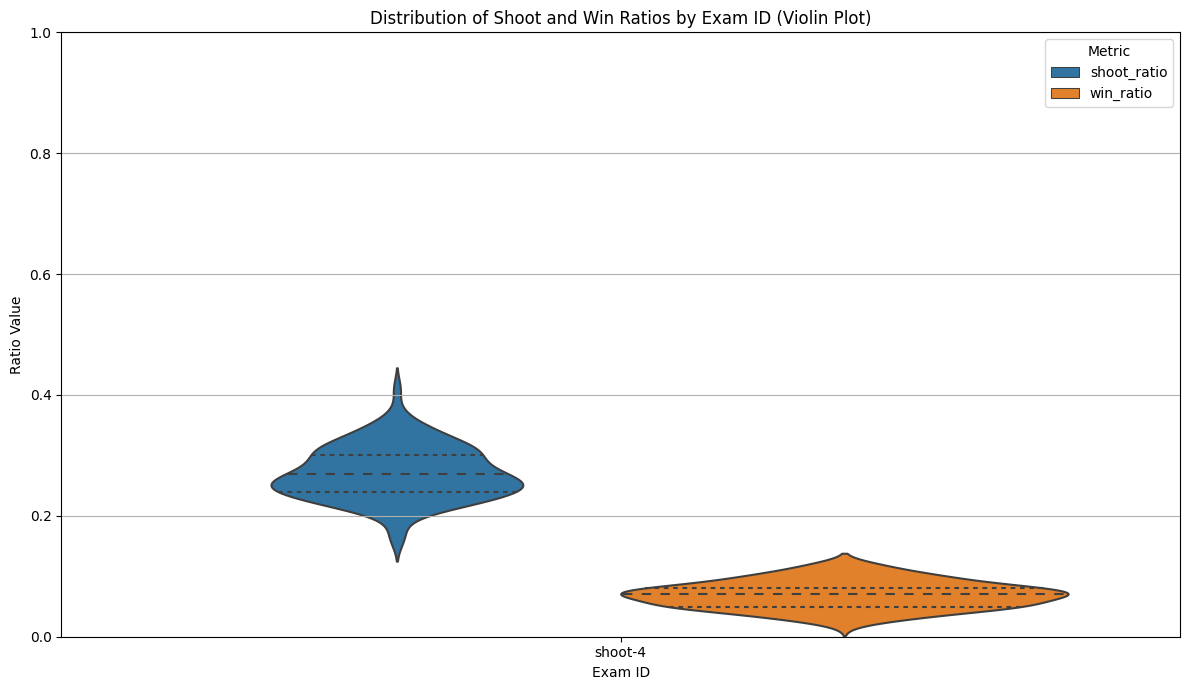

In [ ]:
df_melted = df.melt(id_vars=['n_iter', 'exam_id'], value_vars=['shoot_ratio', 'win_ratio'],
                    var_name='metric', value_name='value')

plt.figure(figsize=(12, 7))

# sns.violinplotを使用してバイオリンプロットを作成
# split=Trueは、hueのカテゴリが2つである場合に、片側のバイオリンとして表示することでスペースを節約する
sns.violinplot(x='exam_id', y='value', hue='metric', data=df_melted, split=False, inner='quartile')

plt.title('Distribution of Shoot and Win Ratios by Exam ID (Violin Plot)')
plt.xlabel('Exam ID')
plt.ylabel('Ratio Value')
plt.ylim(0, 1) # Y軸の範囲を0から1に設定
plt.grid(axis='y')
plt.legend(title='Metric')
plt.tight_layout()